In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

In [3]:
#loading dataset
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9203,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Brnia G,980,2.0,1.0,86.0
13207,Super built-up Area,Ready To Move,Singanayakanahalli,3 BHK,NaN,1480,2.0,0.0,75.0
669,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6640,NaN,NaN,375.0
8292,Super built-up Area,Ready To Move,Yelachenahalli,3 BHK,BaiseBa,1365,2.0,1.0,72.0
329,Super built-up Area,Ready To Move,Kaggalipura,3 BHK,Baowsig,1150,2.0,1.0,55.0


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#percentage missing in cols
(df.isnull().sum() / df.shape[0]) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [9]:
#since society have 41% missing value so this feature will get droped
df.drop(columns=['society'],inplace=True)

In [10]:
#checking unique values in all columns
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [11]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
16-Oct            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64
location
Whitefield                 4.054054
Sarjapur  Road             2.995495
Electronic City            2.267267
Kanakpura Road             2.049550
Thanisandra                1.756757
                             ...   
Park View Layout           0.007508
Xavier Layout              0.007508
Air View Colony            0.007508
akshaya nagar t c palya    0.007508
mvj engineering college    0.007508
Name: count, Length: 1305, dtype: float64
size
2 BHK         39.031532


<h1>Analysis of each column seperately:</h1>

<h2>Analysis of area_type column:</h2>

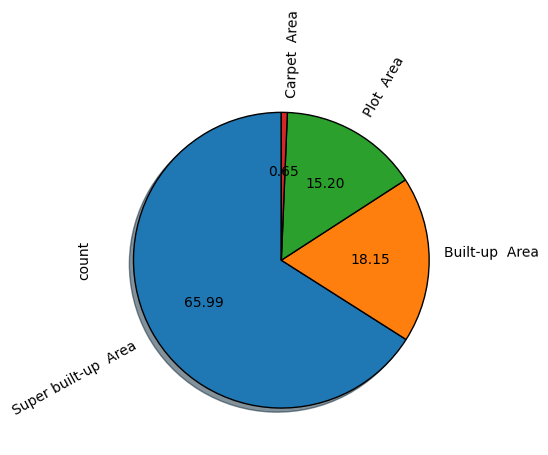

In [12]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

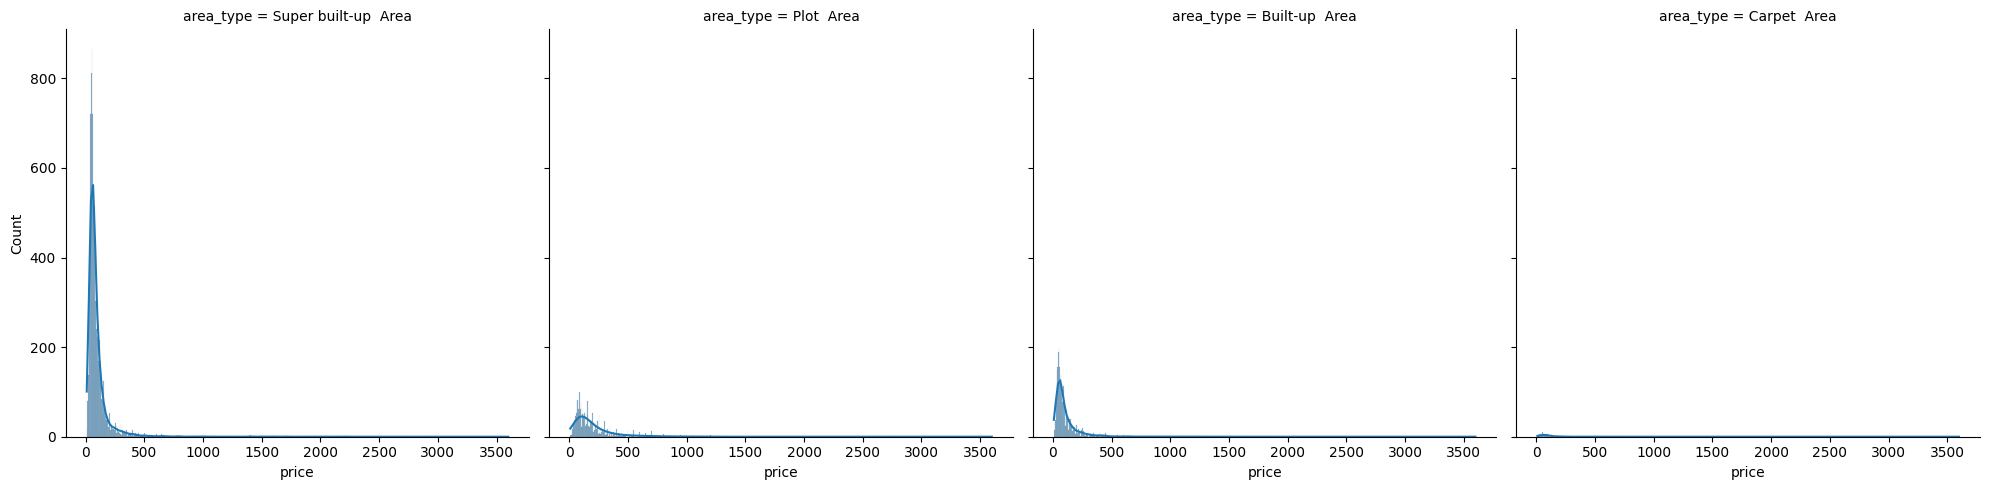

In [13]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [14]:
# area_type have 4 categories out of which one is 66% and also probablity density function of
# all four category is almost same so droping this feature
df.drop(columns=['area_type'],inplace=True)

<h2>Analysis of availability column:</h2>

In [15]:
(df['availability'].value_counts()/df.shape[0])*100

availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
16-Oct            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64

In [16]:
# availability have 81 categories but one value is around 80% so this feature is not usefull
df.drop(columns=['availability'],inplace=True)

In [17]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
12000,Hennur Road,2 BHK,1165,2.0,1.0,67.00
9060,Yelahanka,2 BHK,1065,2.0,1.0,41.38
194,Marathahalli,2 BHK,1200,2.0,2.0,60.00


<h2>Analysis of location column:</h2>

In [18]:
df['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [19]:
df['location'].isna().sum()

np.int64(1)

In [20]:
#filling missing value with mode
df['location'] = df['location'].fillna('Whitefield')

In [21]:
df['location'].nunique()

1305

In [22]:
location_counts = df['location'].value_counts()

In [23]:
len(location_counts[location_counts<=10])

1064

In [24]:
len(location_counts[location_counts>10])

241

In [25]:
# There are 1064 locations with 10 or fewer occurrences.
# To reduce the number of unique categories, these locations will be grouped under a new category named "other".
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [26]:
df['location'].nunique()

242

now there are only 242 categories 

In [27]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
13300,Hosakerehalli,5 Bedroom,1500,6.0,2.0,145.0
10096,other,2 Bedroom,1400,2.0,2.0,160.0
3197,other,3 BHK,1991,3.0,2.0,160.0


<h2>Analysis of size column:</h2>

In [28]:
# now let's work on size column
df['size'].isnull().sum()

np.int64(16)

In [29]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [30]:
# filling missing value with 2 BHK
df['size'] = df['size'].fillna('2 BHK')

In [31]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The 'size' column contains two types of categories: 'Bedroom' and 'BHK'.<br>
To ensure consistency, this needs to be standardized.<br>
making a new column BHK 

In [32]:
df['BHK'] = df['size'].str.split(' ').str[0].astype(int)

In [33]:
df['BHK'].value_counts()

BHK
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

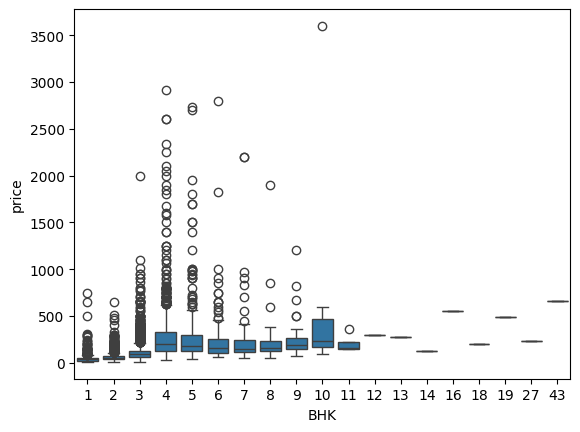

In [34]:
sns.boxplot(x=df['BHK'],y=df['price'])
plt.show()

there are many outliers that need to be fixed,will fixed later

In [35]:
# removinf size column
df.drop(columns=['size'],inplace=True)

In [36]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
8287,Banaswadi,1600,3.0,2.0,74.50,3
2492,Sarjapur,925,2.0,1.0,25.00,2
2425,other,990,2.0,1.0,44.55,2
4026,Hosur Road,1890,3.0,2.0,162.00,3
11507,8th Phase JP Nagar,3300,3.0,2.0,165.00,3


<h2> Analysis of total_sqft column:</h2>

In [37]:
df['total_sqft'].nunique()

2117

In [38]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
# there are few values in ranges 
def convert_ranges_to_sqft(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [40]:
df['total_sqft'] = df['total_sqft'].apply(convert_ranges_to_sqft)

In [41]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK
3816,Lakshminarayana Pura,1190.0,2.0,1.0,75.0,2
7545,other,1300.0,2.0,1.0,67.0,3
7992,other,1200.0,2.0,1.0,61.0,2


<h4>creating a new columns price per sqft because it's a very important feature in real state:</h4>

In [42]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [43]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [44]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [45]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9068,Whitefield,1020.0,2.0,2.0,45.0,2,4411.764706
3909,Bellandur,1050.0,2.0,2.0,72.0,2,6857.142857
7796,Kammasandra,1015.0,2.0,2.0,37.0,2,3645.320197


<h2>Analysis of bath column:</h2>

In [46]:
df['bath'].nunique()

19

In [47]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: count, dtype: int64

In [48]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [49]:
df['bath'].isnull().sum()

np.int64(73)

In [50]:
#filling missing value with median
df['bath'] = df['bath'].fillna(df['bath'].median())

<Axes: xlabel='bath', ylabel='count'>

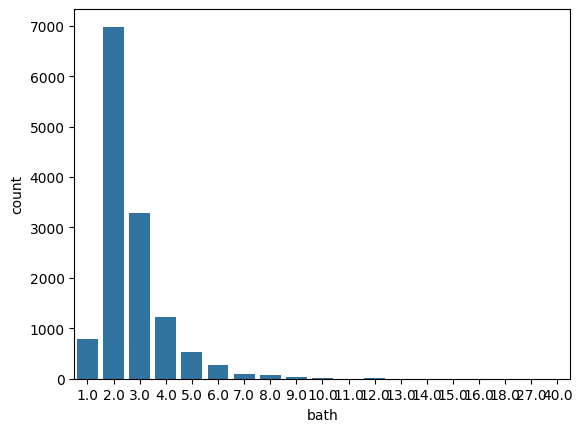

In [51]:
sns.countplot(x=df['bath'])

This column contains outliers, which will be handled later.

In [52]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
11044,Brookefield,1560.0,3.0,2.0,149.00,4,9551.282051
2585,Kammasandra,990.0,2.0,1.0,31.50,2,3181.818182
5013,Bommasandra,955.0,2.0,1.0,35.28,2,3694.240838


<h2>Analysis of balcony column:</h2>

In [53]:
df['balcony'].nunique()

4

In [54]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [55]:
df['balcony'].isnull().sum()

np.int64(609)

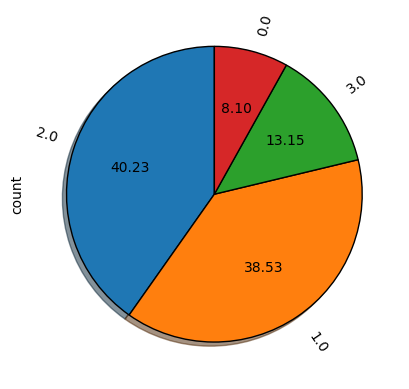

In [56]:
df['balcony'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

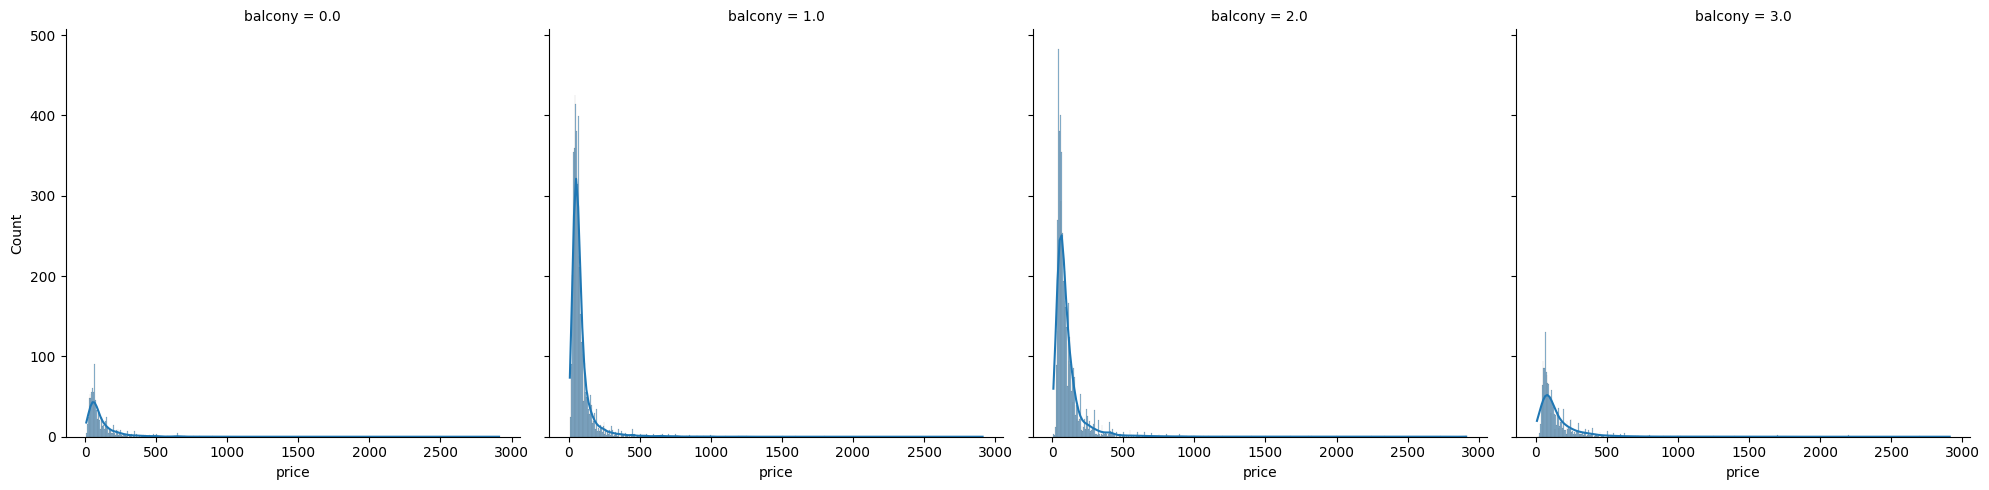

In [57]:
sns.displot(df, x="price", col="balcony", kde=True, col_wrap=4)
plt.show()

since there are only four categories and pdf is almost similar in all so this feature doesn't impact price that much so it will get dropped

In [58]:
df.drop(columns=['balcony'],inplace=True)

In [59]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
7326,Whitefield,1125.0,2.0,45.0,2,4000.000000
9248,Kalena Agrahara,1902.0,3.0,89.0,3,4679.284963
2270,TC Palaya,4800.0,3.0,302.0,4,6291.666667


<h4># The analysis of all columns is complete. Next, the focus will be on detecting and removing outliers.
</h4>

<h1>Outlier's detection and removal</h1>

In [60]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
9230,other,1840.0,1.0,95.00,2,5163.043478
959,Kammasandra,657.5,1.0,18.41,1,2800.000000
13077,KR Puram,1020.0,2.0,39.00,2,3823.529412


In [61]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<h2>outlier's of total_sqft column :</h2>

let's see area per BHK:

In [62]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [63]:
# in 1BHK area should be >= 300 so removing rows in area per BHK is less than 300
df = df[(df['total_sqft']/df['BHK']) >= 300]

In [64]:
df.shape

(12530, 6)

In [65]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


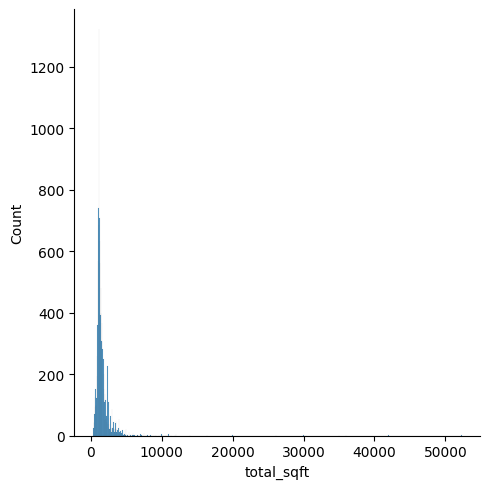

In [66]:
sns.displot(x=df['total_sqft'])

In [67]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
2861,Old Madras Road,1100.0,2.0,70.0,2,6363.636364
11807,Arekere,900.0,2.0,44.5,2,4944.444444
10417,other,1610.0,3.0,85.0,3,5279.503106


<h2>Outlier's of price_per_sqft:</h2>

In [68]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [69]:
#seeing price_per_sqft location wise
df.groupby('location')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
1st Block Jayanagar,10.0,12359.253758,3931.939592,6000.000000,11100.460123,12258.569501,15018.022329,18750.000000
1st Phase JP Nagar,23.0,9726.405918,4802.127570,5274.725275,7170.133907,8425.613866,9901.259524,25000.000000
2nd Phase Judicial Layout,11.0,4048.701183,674.730658,3500.000000,3500.000000,3500.000000,4739.316239,5000.000000
2nd Stage Nagarbhavi,9.0,14381.275720,5272.435848,5666.666667,14666.666667,15033.333333,18750.000000,20416.666667
...,...,...,...,...,...,...,...,...
Yelahanka,208.0,5177.606819,1761.479589,371.428571,4290.940767,5012.513762,5859.524889,19875.776398
Yelahanka New Town,38.0,5860.659870,3889.233175,1875.000000,3776.785714,5040.025016,5413.853463,22475.000000
Yelenahalli,13.0,4012.550871,533.259531,3125.000000,3800.000000,3835.625000,4121.212121,5176.876618


For each location group, price_per_sqft will be kept within the range [mean - standard deviation, mean + standard deviation].

In [70]:
#function to kept price_per_sqft in range
def remove_price_per_sqft_outliers(df):
    temp_df = pd.DataFrame()
    for location,sub_df in df.groupby('location'):
        mean = sub_df['price_per_sqft'].mean()
        std_dev = sub_df['price_per_sqft'].std()
        
        filtered_df = sub_df[(sub_df['price_per_sqft'] >= mean-std_dev) & (sub_df['price_per_sqft'] <= mean+std_dev)]
        temp_df = pd.concat([temp_df,filtered_df],ignore_index=True)
    return temp_df
df = remove_price_per_sqft_outliers(df)

In [71]:
df['price_per_sqft'].describe()

count    10353.000000
mean      5660.848288
std       2270.910791
min       1250.000000
25%       4239.631336
50%       5175.600739
75%       6432.748538
max      24509.803922
Name: price_per_sqft, dtype: float64

In [72]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
2751,Harlur,1460.0,3.0,73.0,3,5000.000000
3416,Hoskote,1695.0,3.0,50.0,3,2949.852507


<h2>Outlier's of BHK column:</h2>

<Axes: xlabel='BHK', ylabel='count'>

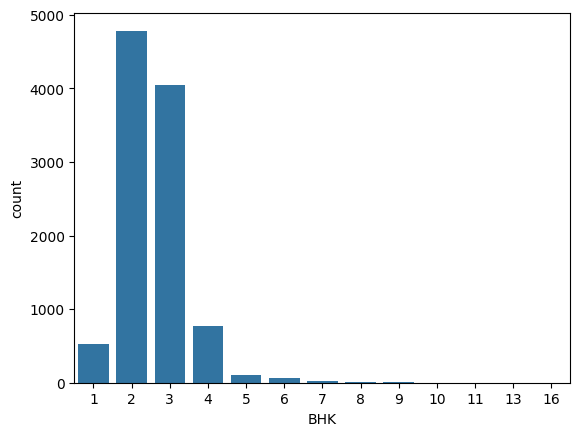

In [73]:
sns.countplot(x=df['BHK'])

<Axes: xlabel='BHK'>

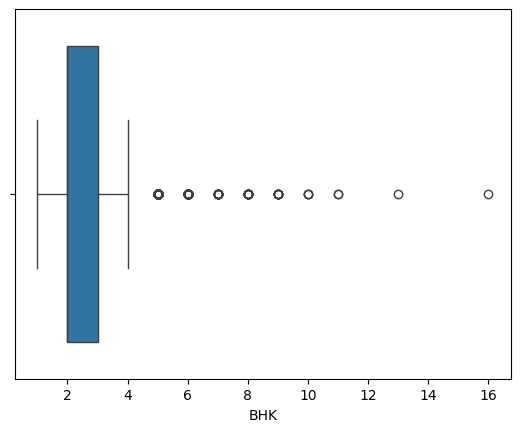

In [74]:
sns.boxplot(x=df['BHK'])

Houses with more than 7 BHK are uncommon, so they will be removed from the dataset.

In [75]:
df = df[df['BHK'] <= 7].copy()

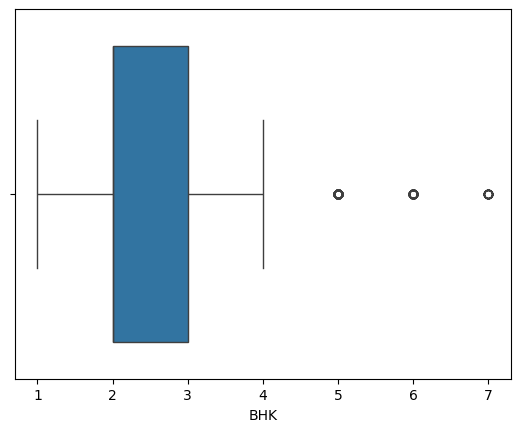

In [76]:
sns.boxplot(x=df['BHK'])
plt.show()

In [77]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
5595,Rachenahalli,1050.0,2.0,52.5,2,5000.0
8038,other,1250.0,3.0,56.0,3,4480.0


<h2>Outlier's of bath column:</h2>

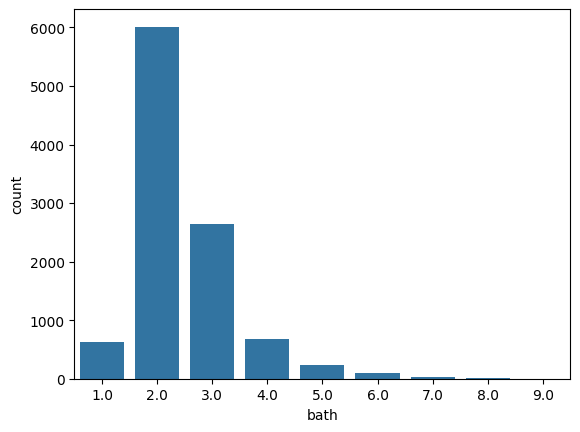

In [78]:
sns.countplot(x=df['bath'])
plt.show()

In [79]:
# Houses with more than 6 bathrooms are uncommon, so they will be removed from the dataset.
df = df[df['bath'] <= 6].copy()

In [80]:
# Ensuring that the number of bathrooms does not exceed BHK + 2
df = df[df['bath'] <= df['BHK'] + 2].copy()

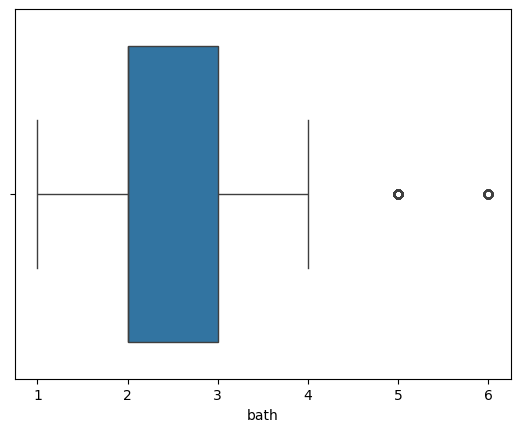

In [81]:
sns.boxplot(x=df['bath'])
plt.show()

In [82]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10287.000000,10287.000000,10287.000000,10287.000000,10287.000000
mean,1491.338360,2.437737,90.257877,2.543696,5658.463876
std,837.874008,0.871027,82.457900,0.793476,2258.106894
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1107.000000,2.000000,48.950000,2.000000,4242.179863
50%,1280.000000,2.000000,67.000000,2.000000,5176.565008
75%,1645.000000,3.000000,100.000000,3.000000,6428.780162
max,30400.000000,6.000000,2100.000000,7.000000,24509.803922


In [83]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
1504,CV Raman Nagar,1392.0,2.0,95.0,2,6824.712644
875,Bannerghatta Road,892.0,2.0,39.0,2,4372.197309


In [84]:
# Dropping the price_per_sqft column as it will no longer be used in further analysis.
df.drop(columns=['price_per_sqft'], inplace=True)

In [85]:
df.sample(3)

,location,total_sqft,bath,price,BHK
1518,Chamrajpet,1565.0,3.0,98.91,3
8425,other,750.0,1.0,25.00,1
6177,Sarjapur Road,2600.0,3.0,200.00,3


<h3>Now the dataset is cleaned</h3>

<h1>Model Building:</h1>

In [86]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score

In [87]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price']),df['price'],test_size=.2,random_state=2)

In [88]:
X_train.sample(3)

,location,total_sqft,bath,BHK
253,9th Phase JP Nagar,1100.0,2.0,2
807,Banashankari Stage VI,1160.0,2.0,2
3369,Hosa Road,1040.0,2.0,2


In [89]:
# transformer for OneHotEncoding
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(drop='first',sparse_output=False,dtype=int,handle_unknown='ignore'),['location'])
],remainder='passthrough')

In [90]:
#scaling
scaler = StandardScaler()

<h2>Applying Linear Regression:</h2>

In [91]:
lr = LinearRegression()

In [92]:
pipe_lr = make_pipeline(one_hot_transformer,scaler,lr)

In [93]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [94]:
y_pred_lr = pipe_lr.predict(X_test)

In [95]:
r2_score(y_test,y_pred_lr)

0.8017182860311151

<h2>Applying Lasso:</h2>

In [96]:
lasso = Lasso()

In [97]:
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)

In [98]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [99]:
y_pred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.7978587601178186

<h2>Applying Ridge:</h2>

In [100]:
ridge = Ridge()

In [101]:
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)

In [102]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [103]:
y_pred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8017480078522327

In [104]:
print("LinearRegression r2_score: ",r2_score(y_test,y_pred_lr))
print("LassoRegression r2_score: ",r2_score(y_test,y_pred_lasso))
print("RidgeRegression r2_score: ",r2_score(y_test,y_pred_ridge))

LinearRegression r2_score:  0.8017182860311151
LassoRegression r2_score:  0.7978587601178186
RidgeRegression r2_score:  0.8017480078522327


In [105]:
import joblib
import os

# Create directory if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Save the model with a custom filename
joblib.dump(model, "saved_models/house_price_prediction.pkl")

# Save the column names used for prediction
columns = {
    "data_columns": X.columns.tolist()  # Replace X with your final training features DataFrame
}
joblib.dump(columns, "saved_models/columns.pkl")

print("✅ Model saved as 'house_price_prediction.pkl' and columns saved.")


NameError: name 'model' is not defined